
# CIFAR-10 Clases Multiples

Hicimos un ejemplo de CNN para clasificar imágenes B-N

Esta vez usaremos otro conjunto de datos famoso, el CIFAR-10 que consiste de imágenes a color de 10 diferentes clases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----

# Los datos

CIFAR-10 es un conjunto de entrenamiento de 50,000 imágenes a color, etiquetadas con 10 categorías, y un conjunto de prueba de 10,000 imágenes.

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0].shape

(32, 32, 3)

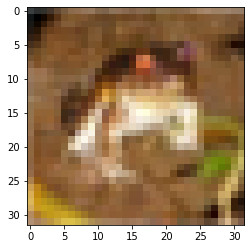

In [5]:
# SAPO
plt.imshow(X_train[0])

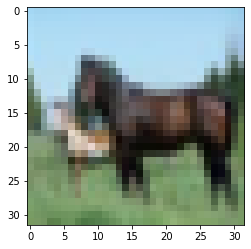

In [6]:
# CABALLO
plt.imshow(X_train[12])

# Pre-procesamiento

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
X_train.max()

255

### Normalizar, o escalar, los datos

In [10]:
X_train = X_train / 225

In [11]:
X_test = X_test / 255

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

## Etiquetas

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

### Los valores de las etiquetas son números, esto puede confundir a la CNN y pensar que es de una escala contínua por lo que se convierten a valores categóricos

In [17]:
y_cat_train = to_categorical(y_train, 10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test, 10)

----------
# Armado del modelo

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
modelo = Sequential()

## Primer conjunto de capas

### Capa convolucional

In [23]:
modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = 'relu',))

### Capa de sub-muestreo (Pooling)

In [24]:
modelo.add(MaxPool2D(pool_size = (2, 2)))

## Segundo conjunto de capas

### Capa convolucional 

In [25]:
modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = 'relu',))

### Capa de sub-muestreo (Pooling)

In [26]:
modelo.add(MaxPool2D(pool_size = (2, 2)))

## Aplanamiento de las imágenes de 32 X 32 a 1024 antes de entrar a la capa final

In [27]:
modelo.add(Flatten())

## 256 neuronas, o unidades, en una capa escondida (se puede "jugar" con este número)

In [28]:
modelo.add(Dense(256, activation = 'relu'))

## La última capa es la clasificadora, en este caso tenemos 10 clases posibles

In [29]:
modelo.add(Dense(10, activation = 'softmax'))

## Compilación del modelo

In [30]:
modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [31]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

### Queremos terminar las iteraciones cuando la pérdida de la validación empieza a separarse mucho de la pérdida de entrenamiento

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

### Ajustamos el modelo con los datos de entrenamiento

In [34]:
modelo.fit(X_train, y_cat_train, epochs = 15, validation_data = (X_test, y_cat_test), callbacks = [early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 23s 468us/sample - loss: 1.5039 - accuracy: 0.4623 - val_loss: 1.3394 - val_accuracy: 0.5240
Epoch 2/15
50000/50000 [==============================] - 22s 444us/sample - loss: 1.1599 - accuracy: 0.5938 - val_loss: 1.1781 - val_accuracy: 0.5952
Epoch 3/15
50000/50000 [==============================] - 22s 450us/sample - loss: 1.0107 - accuracy: 0.6492 - val_loss: 1.6309 - val_accuracy: 0.5030
Epoch 4/15
50000/50000 [==============================] - 23s 453us/sample - loss: 0.9081 - accuracy: 0.6900 - val_loss: 1.0374 - val_accuracy: 0.6491
Epoch 5/15
50000/50000 [==============================] - 26s 524us/sample - loss: 0.8283 - accuracy: 0.7162 - val_loss: 0.9692 - val_accuracy: 0.6777
Epoch 6/15
50000/50000 [==============================] - 22s 446us/sample - loss: 0.7677 - accuracy: 0.7368 - val_loss: 0.9807 - val_accuracy: 0.6842
Epoch 7/15
50000/50000 [====================

In [ ]:
# Se puede grabar el modelo para uso futuro, por ej. Cuando se quiere poner en producción
# model.save('cifar_10epochs.h5')

## Evaluación del modelo

In [36]:
perdidas = pd.DataFrame(modelo.history.history)

In [37]:
perdidas.head()

,loss,accuracy,val_loss,val_accuracy
0,1.503950,0.46232,1.339377,0.5240
1,1.159925,0.59382,1.178127,0.5952
2,1.010686,0.64922,1.630894,0.5030
3,0.908080,0.68996,1.037390,0.6491
4,0.828299,0.71624,0.969176,0.6777


<AxesSubplot:>

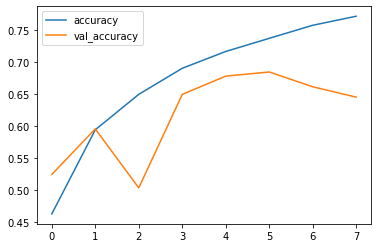

In [38]:
perdidas[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

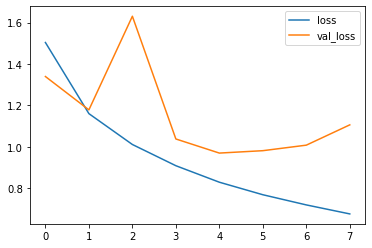

In [39]:
perdidas[['loss','val_loss']].plot()

In [40]:
modelo.metrics_names

['loss', 'accuracy']

In [41]:
print(modelo.metrics_names)
print(modelo.evaluate(X_test, y_cat_test, verbose = 0))

['loss', 'accuracy']
[1.1056667543411254, 0.6449]


Será esta precisión un buen valor?  Una buena comparación sería vrs. predecir al azar.  En ese caso la precisión será del 10%.  Es decir este modelo está entre 6 y 7 veces más exacto.

En todo caso, siempre se puede "jugar" más con los parámetros para ver si se puede obtener algo mejor

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

predicciones = modelo.predict_classes(X_test)

In [43]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.87      0.43      0.58      1000
           1       0.71      0.87      0.78      1000
           2       0.50      0.59      0.54      1000
           3       0.47      0.56      0.51      1000
           4       0.52      0.72      0.61      1000
           5       0.69      0.44      0.53      1000
           6       0.66      0.79      0.72      1000
           7       0.88      0.52      0.65      1000
           8       0.71      0.81      0.75      1000
           9       0.76      0.72      0.74      1000

    accuracy                           0.64     10000
   macro avg       0.68      0.64      0.64     10000
weighted avg       0.68      0.64      0.64     10000



In [44]:
confusion_matrix(y_test, predicciones)

array([[433,  66, 165,  37,  61,   3,  20,   3, 163,  49],
       [  4, 871,   9,   9,   8,   0,  20,   1,  28,  50],
       [ 16,  12, 592,  84, 121,  48,  73,  13,  25,  16],
       [  3,  22,  89, 560,  99,  61, 101,  11,  26,  28],
       [  3,   6,  92,  58, 720,  20,  69,  11,  17,   4],
       [  1,   9,  96, 269,  80, 438,  61,  21,  17,   8],
       [  3,  13,  46,  64,  60,  13, 787,   1,   7,   6],
       [  9,  11,  64,  83, 196,  51,  26, 521,  11,  28],
       [ 18,  61,  23,  21,  16,   3,  14,   2, 810,  32],
       [  9, 155,  17,  18,  11,   1,  21,   7,  44, 717]])

<AxesSubplot:>

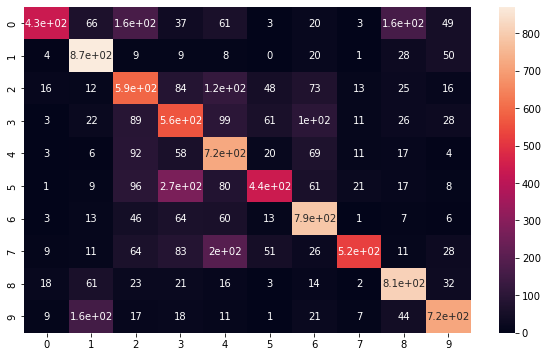

In [45]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test, predicciones), annot = True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicción de una imagen dada

In [46]:
mi_imagen = X_test[16]

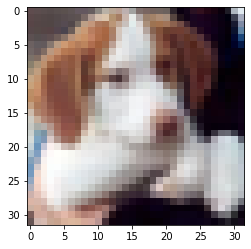

In [47]:
plt.imshow(mi_imagen)

Adecuar la forma a lo requerido por la CNN (num_imagenes, ancho, alto, num_canales_color)

In [48]:
modelo.predict_classes(mi_imagen.reshape(1, 32, 32, 3))

array([5])

5 es PERRO, en este caso acertó!

Para tener las etiquetas de todos los animales, se puede visitar

https://www.cs.toronto.edu/~kriz/cifar.html